# 1. K-means 클러스터링(비계층적군집분석) : 아카데미자료

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import cluster

In [6]:
# 학습 데이터
academy = pd.read_csv('./data/academy.csv', encoding='cp949')
academy.columns = ['num','kor','math','eng','science','intention']
academy.drop(columns='num', inplace=True)
academy.head()

,kor,math,eng,science,intention
0,90,75,85,60,70
1,65,90,60,88,80
2,45,53,48,50,60
3,77,96,62,92,70
4,88,89,80,82,90


In [8]:
academy_arr = academy.values
print('data shape:', academy_arr.shape)

data shape: (52, 5)


In [9]:
# 모델 생성
model = cluster.KMeans(n_clusters=5)
model.fit(academy_arr)

KMeans(n_clusters=5)

In [11]:
labels= model.labels_
labels

array([1, 0, 2, 0, 3, 3, 4, 0, 2, 1, 0, 3, 1, 2, 1, 0, 0, 3, 0, 0, 0, 0,
       2, 4, 0, 4, 1, 3, 4, 1, 0, 3, 1, 1, 2, 4, 0, 3, 3, 4, 1, 3, 1, 4,
       2, 0, 1, 4, 3, 1, 2, 0])

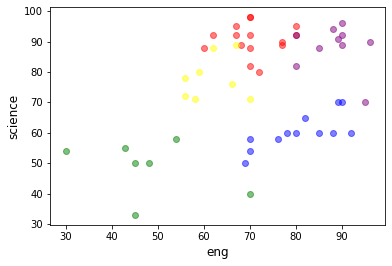

In [16]:
# 산포도
ldata = academy_arr[labels==0]
plt.scatter(ldata[:,2], ldata[:,3], c='red', alpha=0.5, marker='o')

ldata = academy_arr[labels==1]
plt.scatter(ldata[:,2], ldata[:,3], c='blue', alpha=0.5, marker='o')

ldata = academy_arr[labels==2]
plt.scatter(ldata[:,2], ldata[:,3], c='green', alpha=0.5, marker='o')

ldata = academy_arr[labels==3]
plt.scatter(ldata[:,2], ldata[:,3], c='purple', alpha=0.5, marker='o')

ldata = academy_arr[labels==4]
plt.scatter(ldata[:,2], ldata[:,3], c='yellow', alpha=0.5, marker='o')

plt.xlabel(academy.columns[2], fontsize='large')
plt.ylabel(academy.columns[3], fontsize='large')
plt.show()

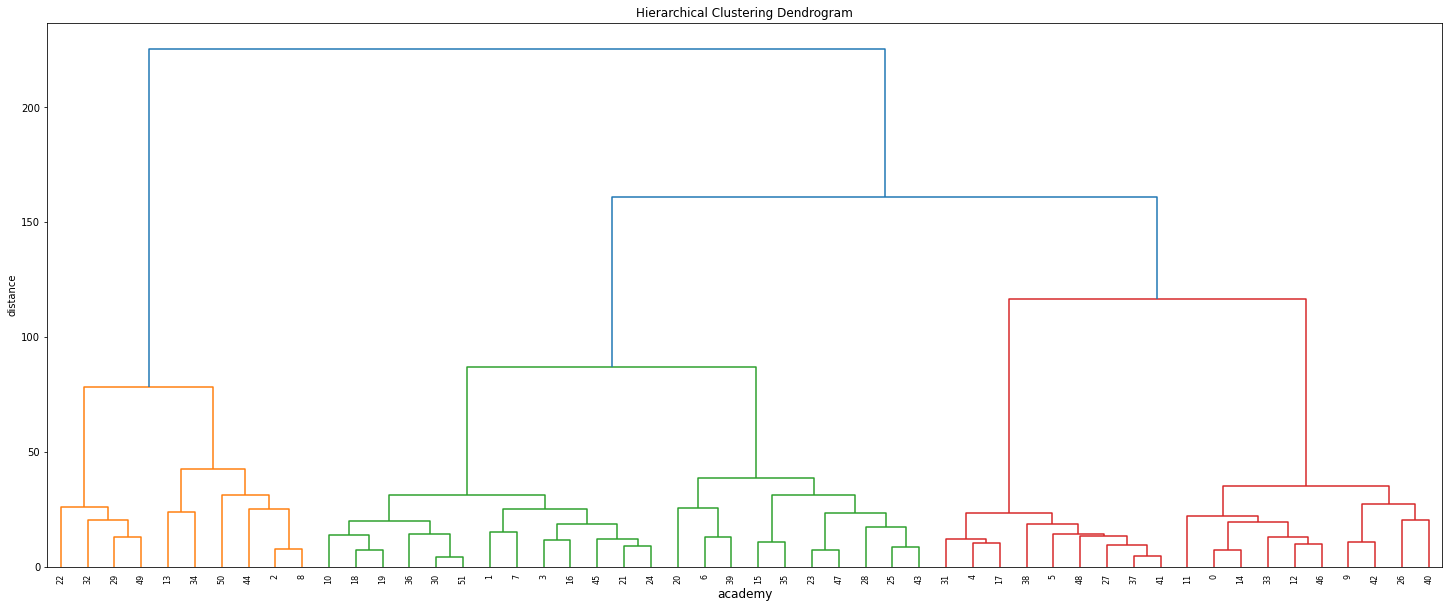

In [18]:
# 덴드로그램

from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(academy_arr, 'ward')

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('academy', fontsize='large')
plt.ylabel('distance')

dendrogram(z,
          leaf_rotation=90, # rotation x axis
          leaf_font_size=8)
plt.show()